In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\cas2cer\Documents\repositories\scikit-learn\winequality-white.csv", sep=";")

Exploratory Data Analysis 
we have to discover the wine quality
target: quality

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
df['quality'].unique() # value range limited, so it's a classification problem

array([6, 5, 7, 8, 4, 3, 9])

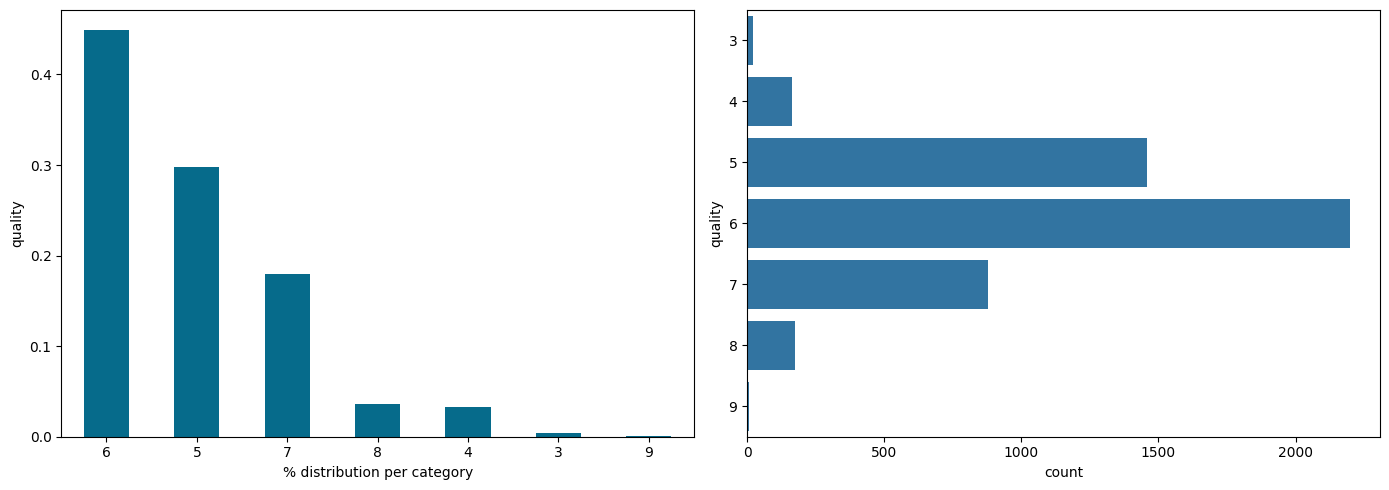

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
df['quality'].value_counts(normalize=True).plot.bar(rot=0, color='#066b8b')
plt.ylabel('quality')
plt.xlabel('% distribution per category')
plt.subplot(1,2,2)
sns.countplot(data=df,y='quality')
plt.tight_layout()
plt.show()   

In [7]:
df_features = df.drop(columns='quality')

C:\Users\cas2cer\AppData\Local\Temp\ipykernel_13008\2635210355.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_features['alcohol'],shade=True,color='#d1aa00')


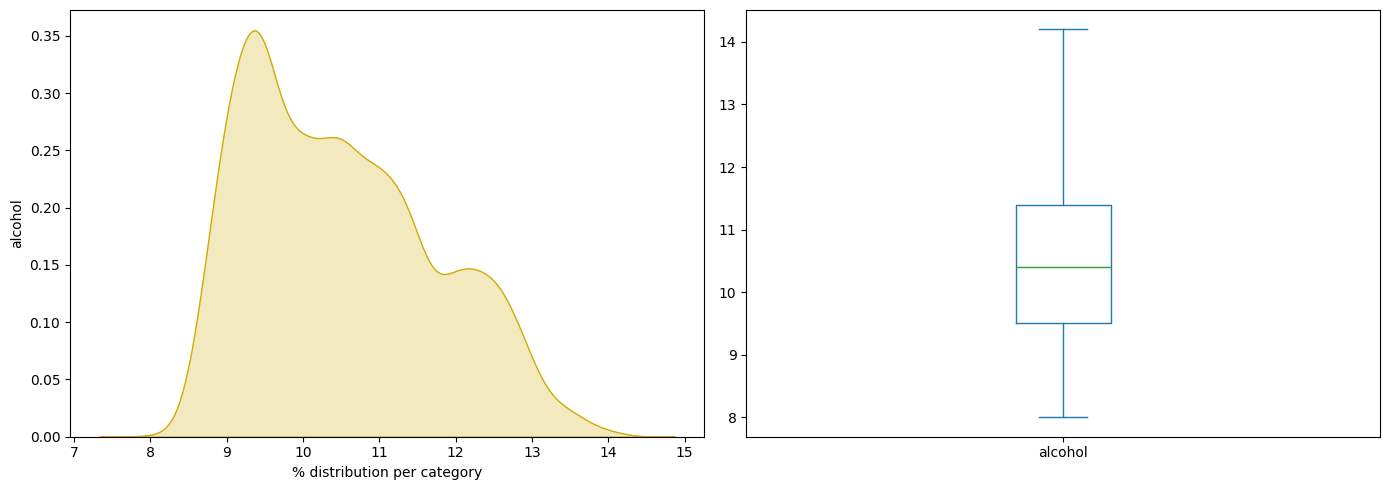

In [8]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
ax = sns.kdeplot(df_features['alcohol'],shade=True,color='#d1aa00')
plt.ylabel('alcohol')
plt.xlabel('% distribution per category')
plt.subplot(1,2,2)
df_features['alcohol'].plot.box()
plt.tight_layout()
plt.show()

In [9]:
num_columns = df_features.columns.tolist()
num_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

C:\Users\cas2cer\AppData\Local\Temp\ipykernel_13008\3872972725.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='#d1aa00',shade=True)
C:\Users\cas2cer\AppData\Local\Temp\ipykernel_13008\3872972725.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='#d1aa00',shade=True)
C:\Users\cas2cer\AppData\Local\Temp\ipykernel_13008\3872972725.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col],color='#d1aa00',shade=True)
C:\Users\cas2cer\AppData\Local\Temp\ipykernel_13008\3872972725.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an er

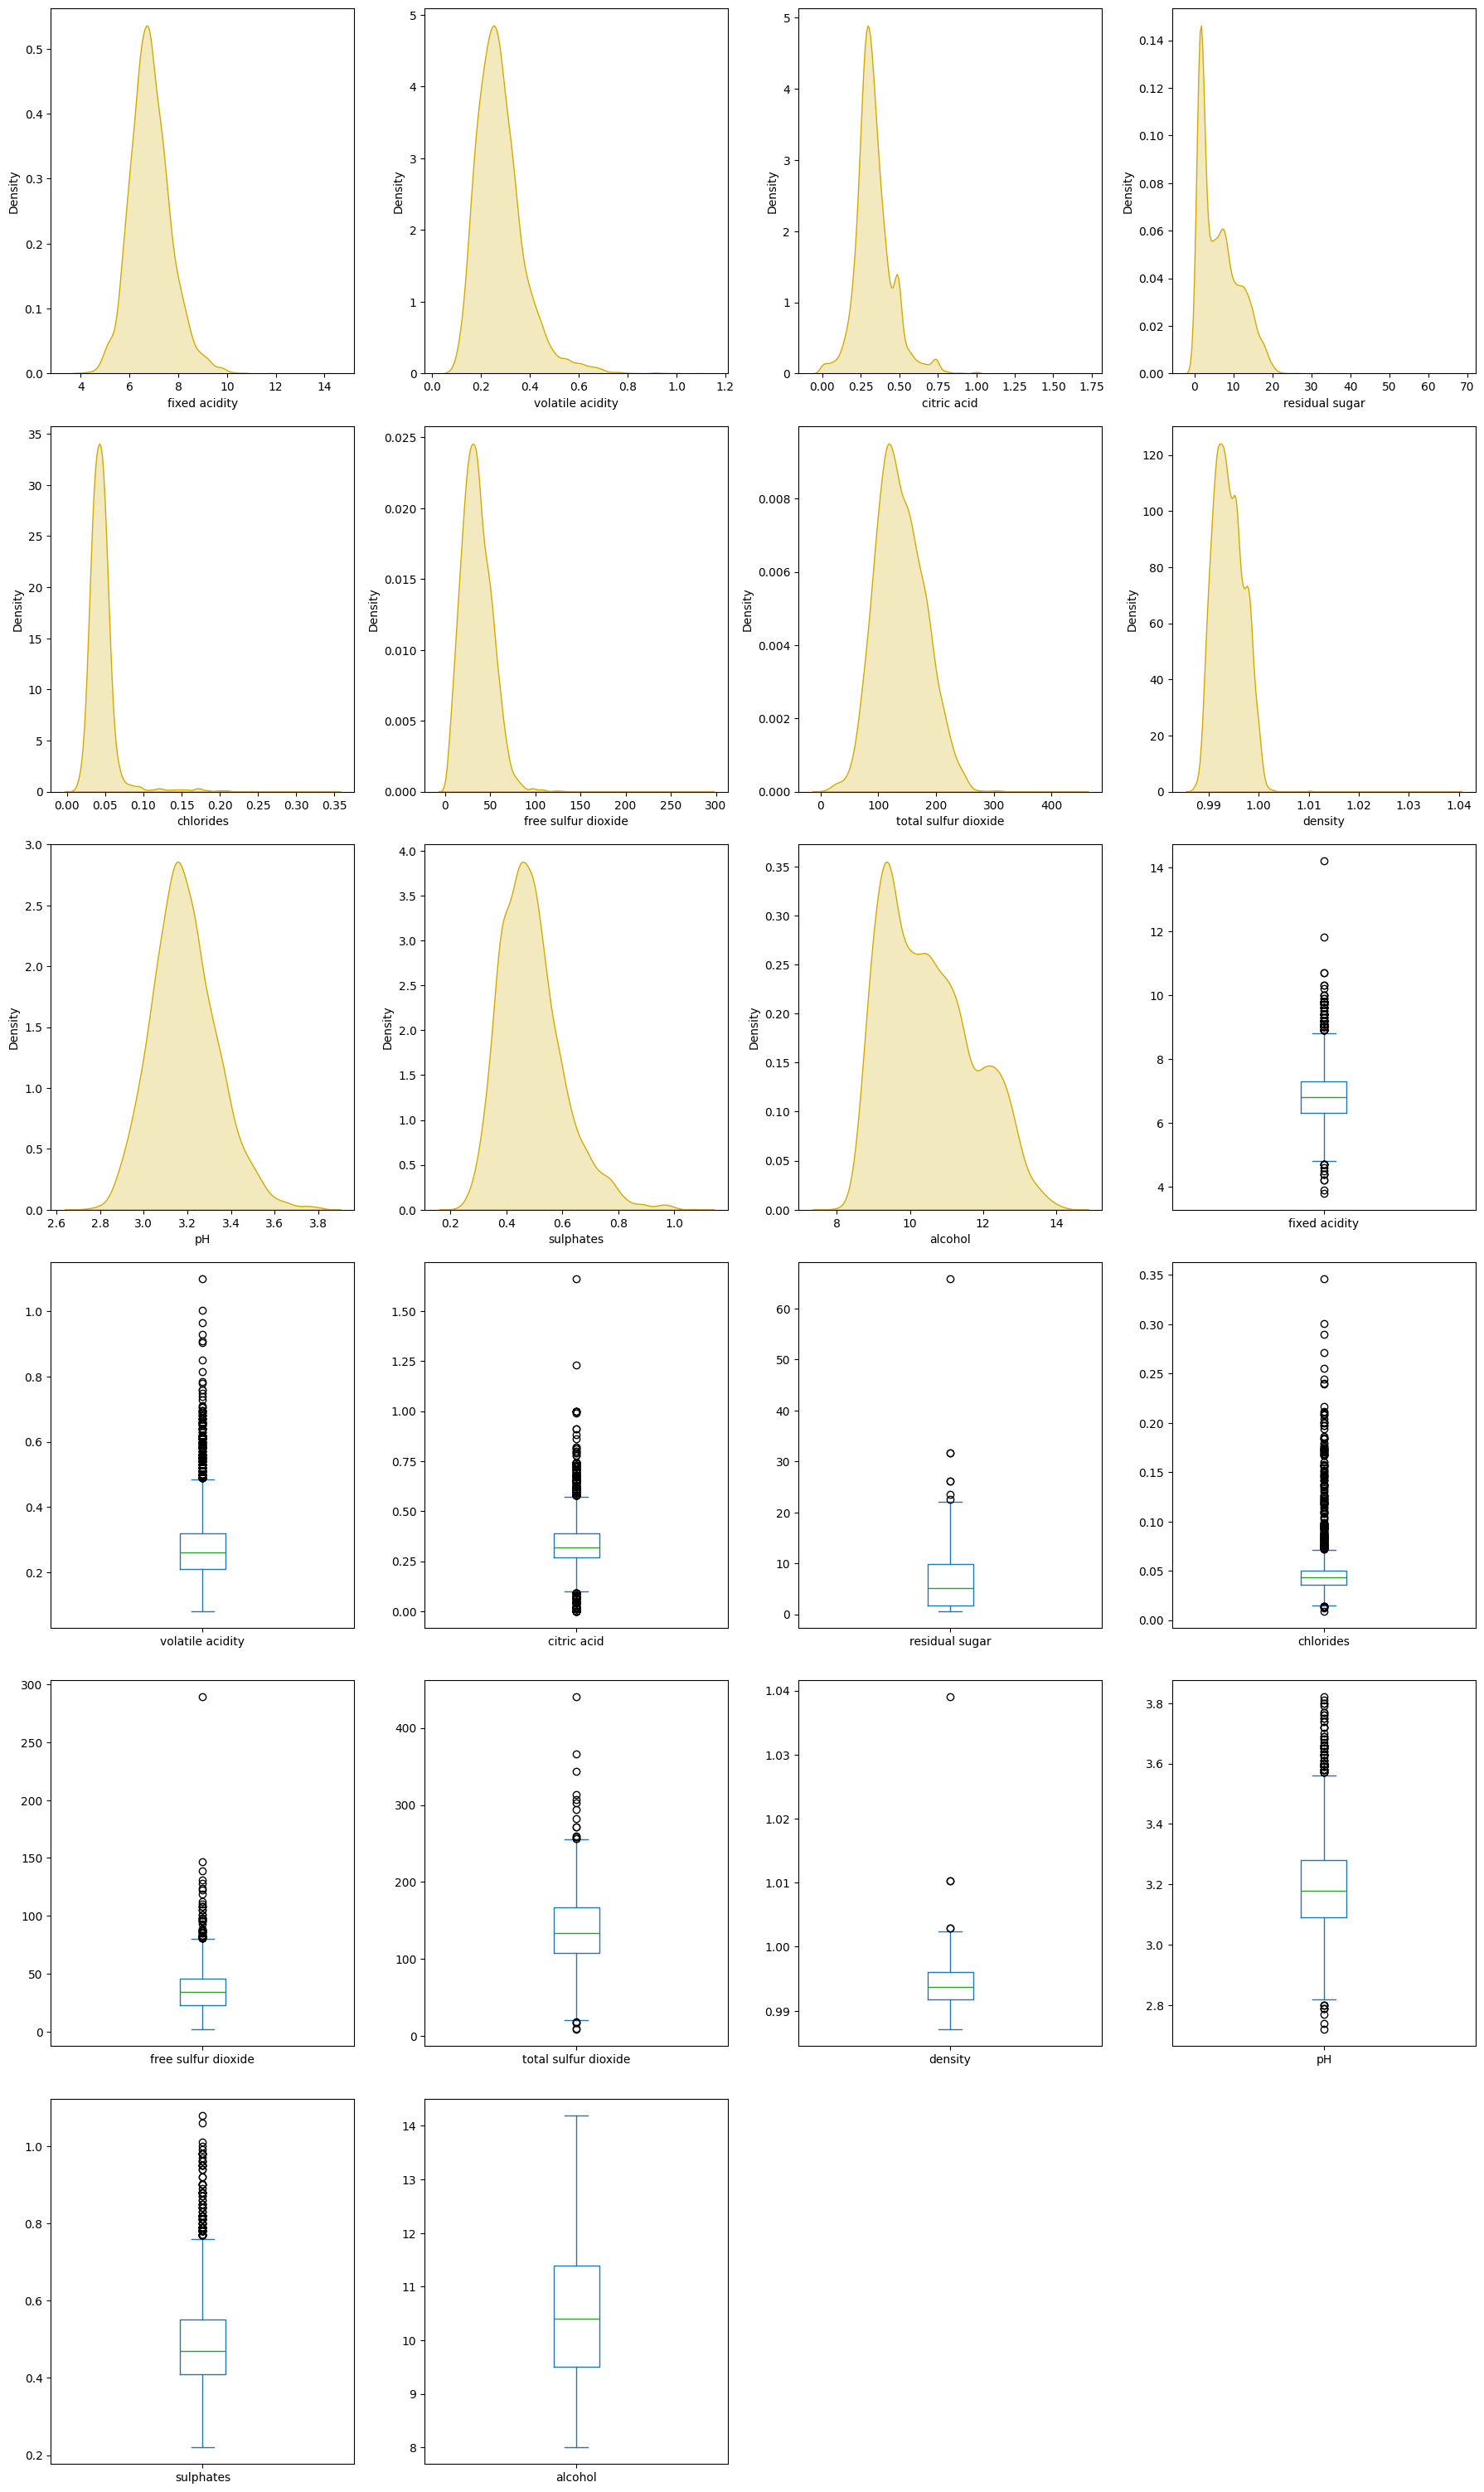

In [10]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='#d1aa00',shade=True)
    plt.subplot(8,4,i+11)
    df[col].plot.box()
plt.tight_layout() 
plt.show()

In [11]:
pd.DataFrame(data=[df[num_columns].skew(),df[num_columns].kurtosis()],index=['skewness','kurtosis'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
skewness,0.647751,1.576980,1.281920,1.077094,5.023331,1.406745,0.390710,0.977773,0.457783,0.977194,0.487342
kurtosis,2.172178,5.091626,6.174901,3.469820,37.564600,11.466342,0.571853,9.793807,0.530775,1.590930,-0.698425


<Axes: xlabel='quality', ylabel='sulphates'>

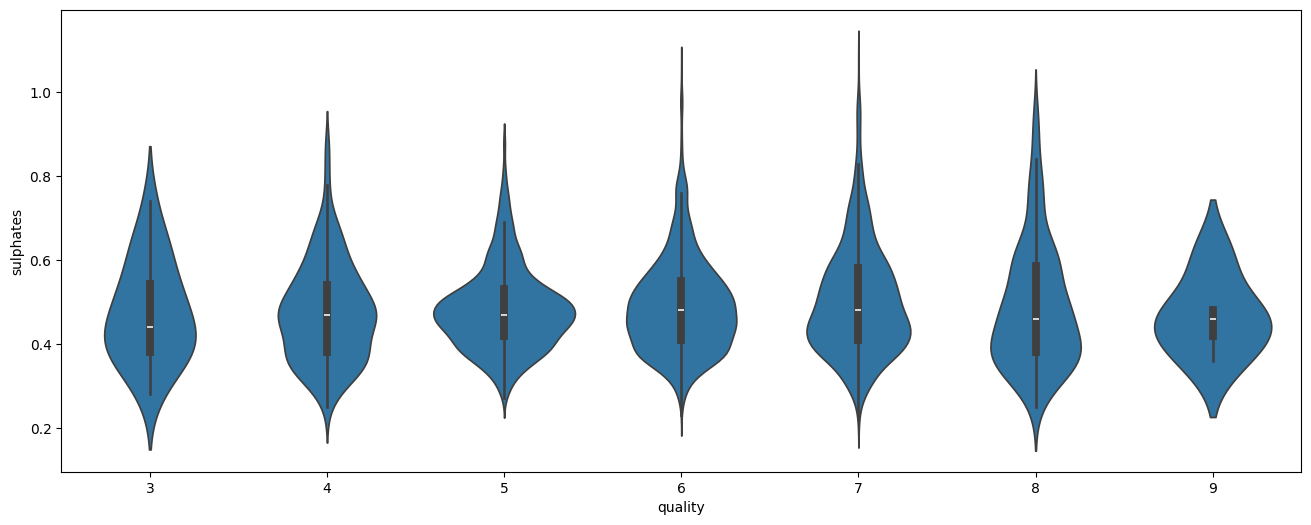

In [12]:
plt.figure(figsize=(16,6))
sns.violinplot(data=df, x='quality', y='sulphates')

c:\Users\cas2cer\Documents\repositories\scikit-learn\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\cas2cer\Documents\repositories\scikit-learn\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 73.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\cas2cer\Documents\repositories\scikit-learn\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

c:\Users\cas2cer\Documents\repositories\scikit-learn\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\cas2cer\Documents\repositories\scikit-learn\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\cas2cer\Documents\repositories\scikit-learn\venv\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


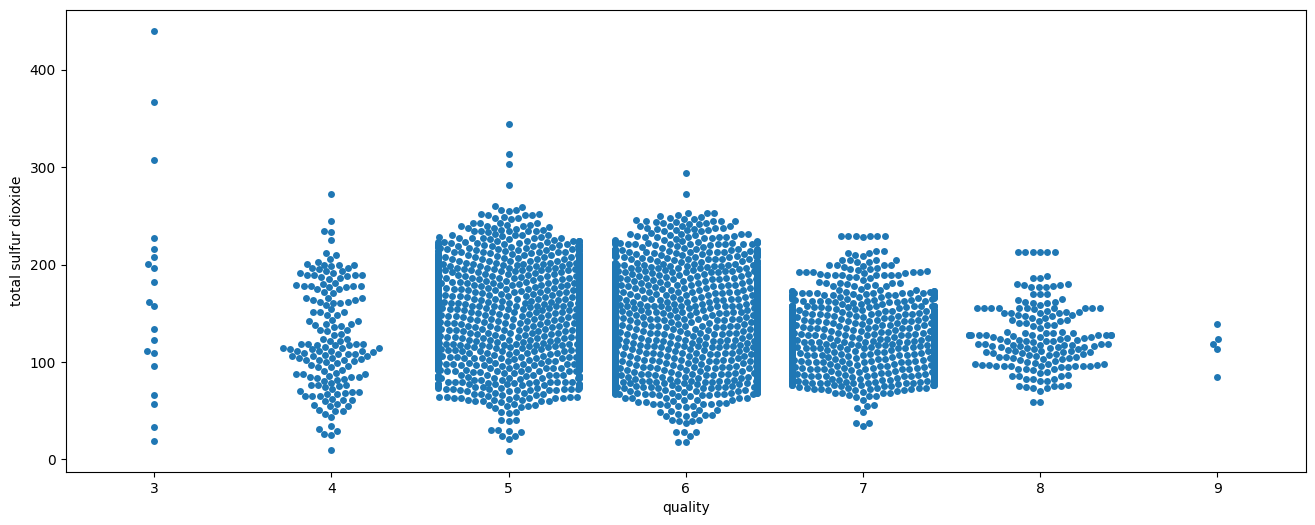

In [13]:
plt.figure(figsize=(16,6))
sns.swarmplot(x="quality", y="total sulfur dioxide", data=df)


In [14]:
quality_cat = df.quality.unique()  # Prende tutti i valori unici di qualità
quality_cat.sort()                 # Li ordina in modo crescente

qual_TSD = []
for i, quality in enumerate(quality_cat):
    media_tsd = df['total sulfur dioxide'].loc[df['quality'] == quality].mean()
    qual_TSD.append([quality, media_tsd])


In [15]:
df_qual_TSD = pd.DataFrame(qual_TSD, columns =['Quality', 'Mean TSD'])

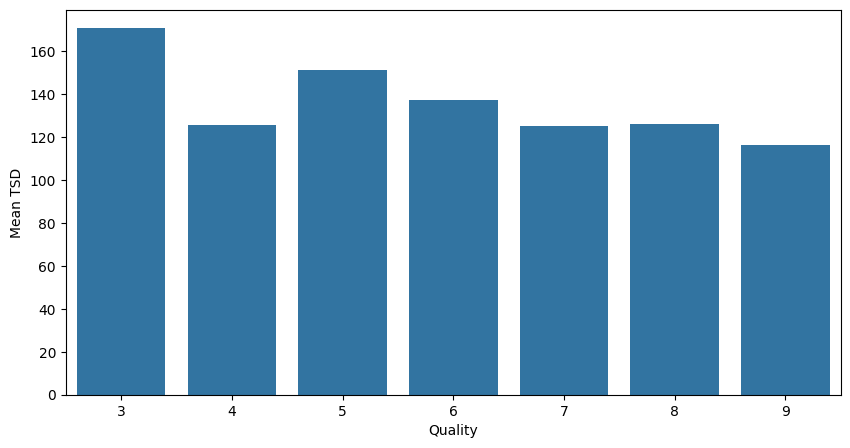

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x="Quality", y="Mean TSD", data=df_qual_TSD)
plt.show()